Імпортуємо потрібні бібліотеки і завантажимо дані

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('application_train.csv', sep = ',')
test_data = pd.read_csv('application_test.csv', sep = ',')

Отримаємо основну інформацію про датасет

In [3]:
print(train_data.shape)
train_data.sample(5)

(307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
22940       126693       0         Cash loans           F            Y   
128275      248796       0         Cash loans           M            Y   
161880      287663       1         Cash loans           F            N   
44889       152001       1         Cash loans           M            Y   
251917      391488       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
22940                Y             0          153000.0    922500.0   
128275               Y             1          157500.0    497520.0   
161880               N             1          112500.0    288873.0   
44889                N             0           67500.0    545040.0   
251917               N             0          202500.0   1102171.5   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
22940       27103.5  ...                 0                0                0   
128275      33376.5  ...                 0                0                0   
161880      19435.5  ...                 0                0                0   
44889       25407.0  ...                 0                0                0   
251917      46827.0  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
22940                 0                        0.0                       0.0   
128275                0                        NaN                       NaN   
161880                0                        0.0                       0.0   
44889                 0                        0.0                       0.0   
251917                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
22940                          0.0                        2.0   
128275                         NaN                        NaN   
161880                         0.0                        0.0   
44889                          0.0                        0.0   
251917                         0.0                        3.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
22940                         0.0                         6.0  
128275                        NaN                         NaN  
161880                        0.0                         0.0  
44889                         0.0                         2.0  
251917                        2.0                         3.0  

[5 rows x 122 columns]

In [4]:
print(test_data.shape)
test_data.sample(5)

(48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
29066      311820         Cash loans           F            N               Y   
14244      202698         Cash loans           F            N               Y   
39812      393168         Cash loans           M            Y               Y   
9465       168954         Cash loans           F            N               Y   
9068       166095         Cash loans           F            N               N   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
29066             0          157500.0    540000.0      20358.0   
14244             1           58500.0    297000.0      15291.0   
39812             1          202500.0    693301.5      35527.5   
9465              0          135000.0    724905.0      27459.0   
9068              0           54000.0    135000.0       9823.5   

       AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
29066         540000.0  ...                0                0   
14244         297000.0  ...                0                0   
39812         598500.0  ...                0                0   
9465          598500.0  ...                0                0   
9068          135000.0  ...                0                0   

      FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
29066                0                0                        0.0   
14244                0                0                        0.0   
39812                0                0                        0.0   
9465                 0                0                        0.0   
9068                 0                0                        0.0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
29066                        0.0                         0.0   
14244                        0.0                         0.0   
39812                        0.0                         0.0   
9465                         0.0                         0.0   
9068                         0.0                         0.0   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
29066                        0.0                        0.0   
14244                        0.0                        0.0   
39812                        0.0                        0.0   
9465                         0.0                        0.0   
9068                         0.0                        0.0   

       AMT_REQ_CREDIT_BUREAU_YEAR  
29066                         1.0  
14244                         4.0  
39812                         2.0  
9465                          3.0  
9068                          4.0  

[5 rows x 121 columns]

In [5]:
train_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [6]:
test_data.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object

In [7]:
print(train_data.isnull().sum())

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


In [8]:
print(test_data.isnull().sum())

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64


In [9]:
train_data[train_data.duplicated()]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, ...]
Index: []

[0 rows x 122 columns]

In [10]:
test_data[test_data.duplicated()]

Empty DataFrame
Columns: [SK_ID_CURR, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, ...]
Index: []

[0 rows x 121 columns]

In [11]:
train_data.describe(include="all")

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
count   3.075110e+05  307499.000000  ...     307511.000000    307511.000000   
unique           NaN            NaN  ...               NaN              NaN   
top              NaN            NaN  ...               NaN              NaN   
freq             NaN            NaN  ...               NaN              NaN   
mean    5.990260e+05   27108.573909  ...          0.008130         0.000595   
std     4.024908e+05   14493.737315  ...          0.089798         0.024387   
min     4.500000e+04    1615.500000  ...          0.000000         0.000000   
25%     2.700000e+05   16524.000000  ...          0.000000         0.000000   
50%     5.135310e+05   24903.000000  ...          0.000000         0.000000   
75%     8.086500e+05   34596.000000  ...          0.000000         0.000000   
max     4.050000e+06  258025.500000  ...          1.000000         1.000000   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
count     307511.000000    307511.000000              265992.000000   
unique              NaN              NaN                        NaN   
top                 NaN              NaN                        NaN   
freq                NaN              NaN                        NaN   
mean           0.000507         0.000335                   0.006402   
std            0.022518         0.018299                   0.083849   
min            0.000000         0.000000                   0.000000   
25%            0.000000         0.000000                   0.000000   
50%            0.000000         0.000000                   0.000000   
75%            0.000000         0.000000                   0.000000   
max            1.000000         1.000000                   4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
unique                       NaN                         NaN   
top                          NaN                         NaN   
freq                         NaN                         NaN   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000           

In [12]:
test_data.describe(include="all")

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
count    48744.000000              48744       48744        48744   
unique            NaN                  2           2            2   
top               NaN         Cash loans           F            N   
freq              NaN              48305       32678        32311   
mean    277796.676350                NaN         NaN          NaN   
std     103169.547296                NaN         NaN          NaN   
min     100001.000000                NaN         NaN          NaN   
25%     188557.750000                NaN         NaN          NaN   
50%     277549.000000                NaN         NaN          NaN   
75%     367555.500000                NaN         NaN          NaN   
max     456250.000000                NaN         NaN          NaN   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count            48744  48744.000000      4.874400e+04  4.874400e+04   
unique               2           NaN               NaN           NaN   
top                  Y           NaN               NaN           NaN   
freq             33658           NaN               NaN           NaN   
mean               NaN      0.397054      1.784318e+05  5.167404e+05   
std                NaN      0.709047      1.015226e+05  3.653970e+05   
min                NaN      0.000000      2.694150e+04  4.500000e+04   
25%                NaN      0.000000      1.125000e+05  2.606400e+05   
50%                NaN      0.000000      1.575000e+05  4.500000e+05   
75%                NaN      1.000000      2.250000e+05  6.750000e+05   
max                NaN     20.000000      4.410000e+06  2.245500e+06   

          AMT_ANNUITY  AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
count    48720.000000     4.874400e+04  ...     48744.000000          48744.0   
unique            NaN              NaN  ...              NaN              NaN   
top               NaN              NaN  ...              NaN              NaN   
freq              NaN              NaN  ...              NaN              NaN   
mean     29426.240209     4.626188e+05  ...         0.001559              0.0   
std      16016.368315     3.367102e+05  ...         0.039456              0.0   
min       2295.000000     4.500000e+04  ...         0.000000              0.0   
25%      17973.000000     2.250000e+05  ...         0.000000              0.0   
50%      26199.000000     3.960000e+05  ...         0.000000              0.0   
75%      37390.500000     6.300000e+05  ...         0.000000              0.0   
max     180576.000000     2.245500e+06  ...         1.000000              0.0   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
count           48744.0          48744.0               42695.000000   
unique              NaN              NaN                        NaN   
top                 NaN              NaN                        NaN   
freq                NaN              NaN                        NaN   
mean                0.0              0.0                   0.002108   
std                 0.0              0.0                   0.046373   
min                 0.0              0.0                   0.000000   
25%                 0.0              0.0                   0.000000   
50%                 0.0              0.0                   0.000000   
75%                 0.0              0.0                   0.000000   
max                 0.0              0.0                   2.000000   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count                42695.000000                42695.000000   
unique                        NaN                         NaN   
top                           NaN                         NaN   
freq                          NaN                         NaN   
mean                     0.001803                    0.002787   
std                      0.046132                    0.054037   
min                      0.000000   

Як бачимо для повного відображення в датасеті забагато ознак, але можемо помітити відсутність дублікатів, розміри датасету і велику кількість missing values в деяких колонках

Подивимось на кореляцію між ознаками

C:\Users\sench\AppData\Local\Temp\ipykernel_17236\3327902991.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mx_train = train_data.corr()


<AxesSubplot: >

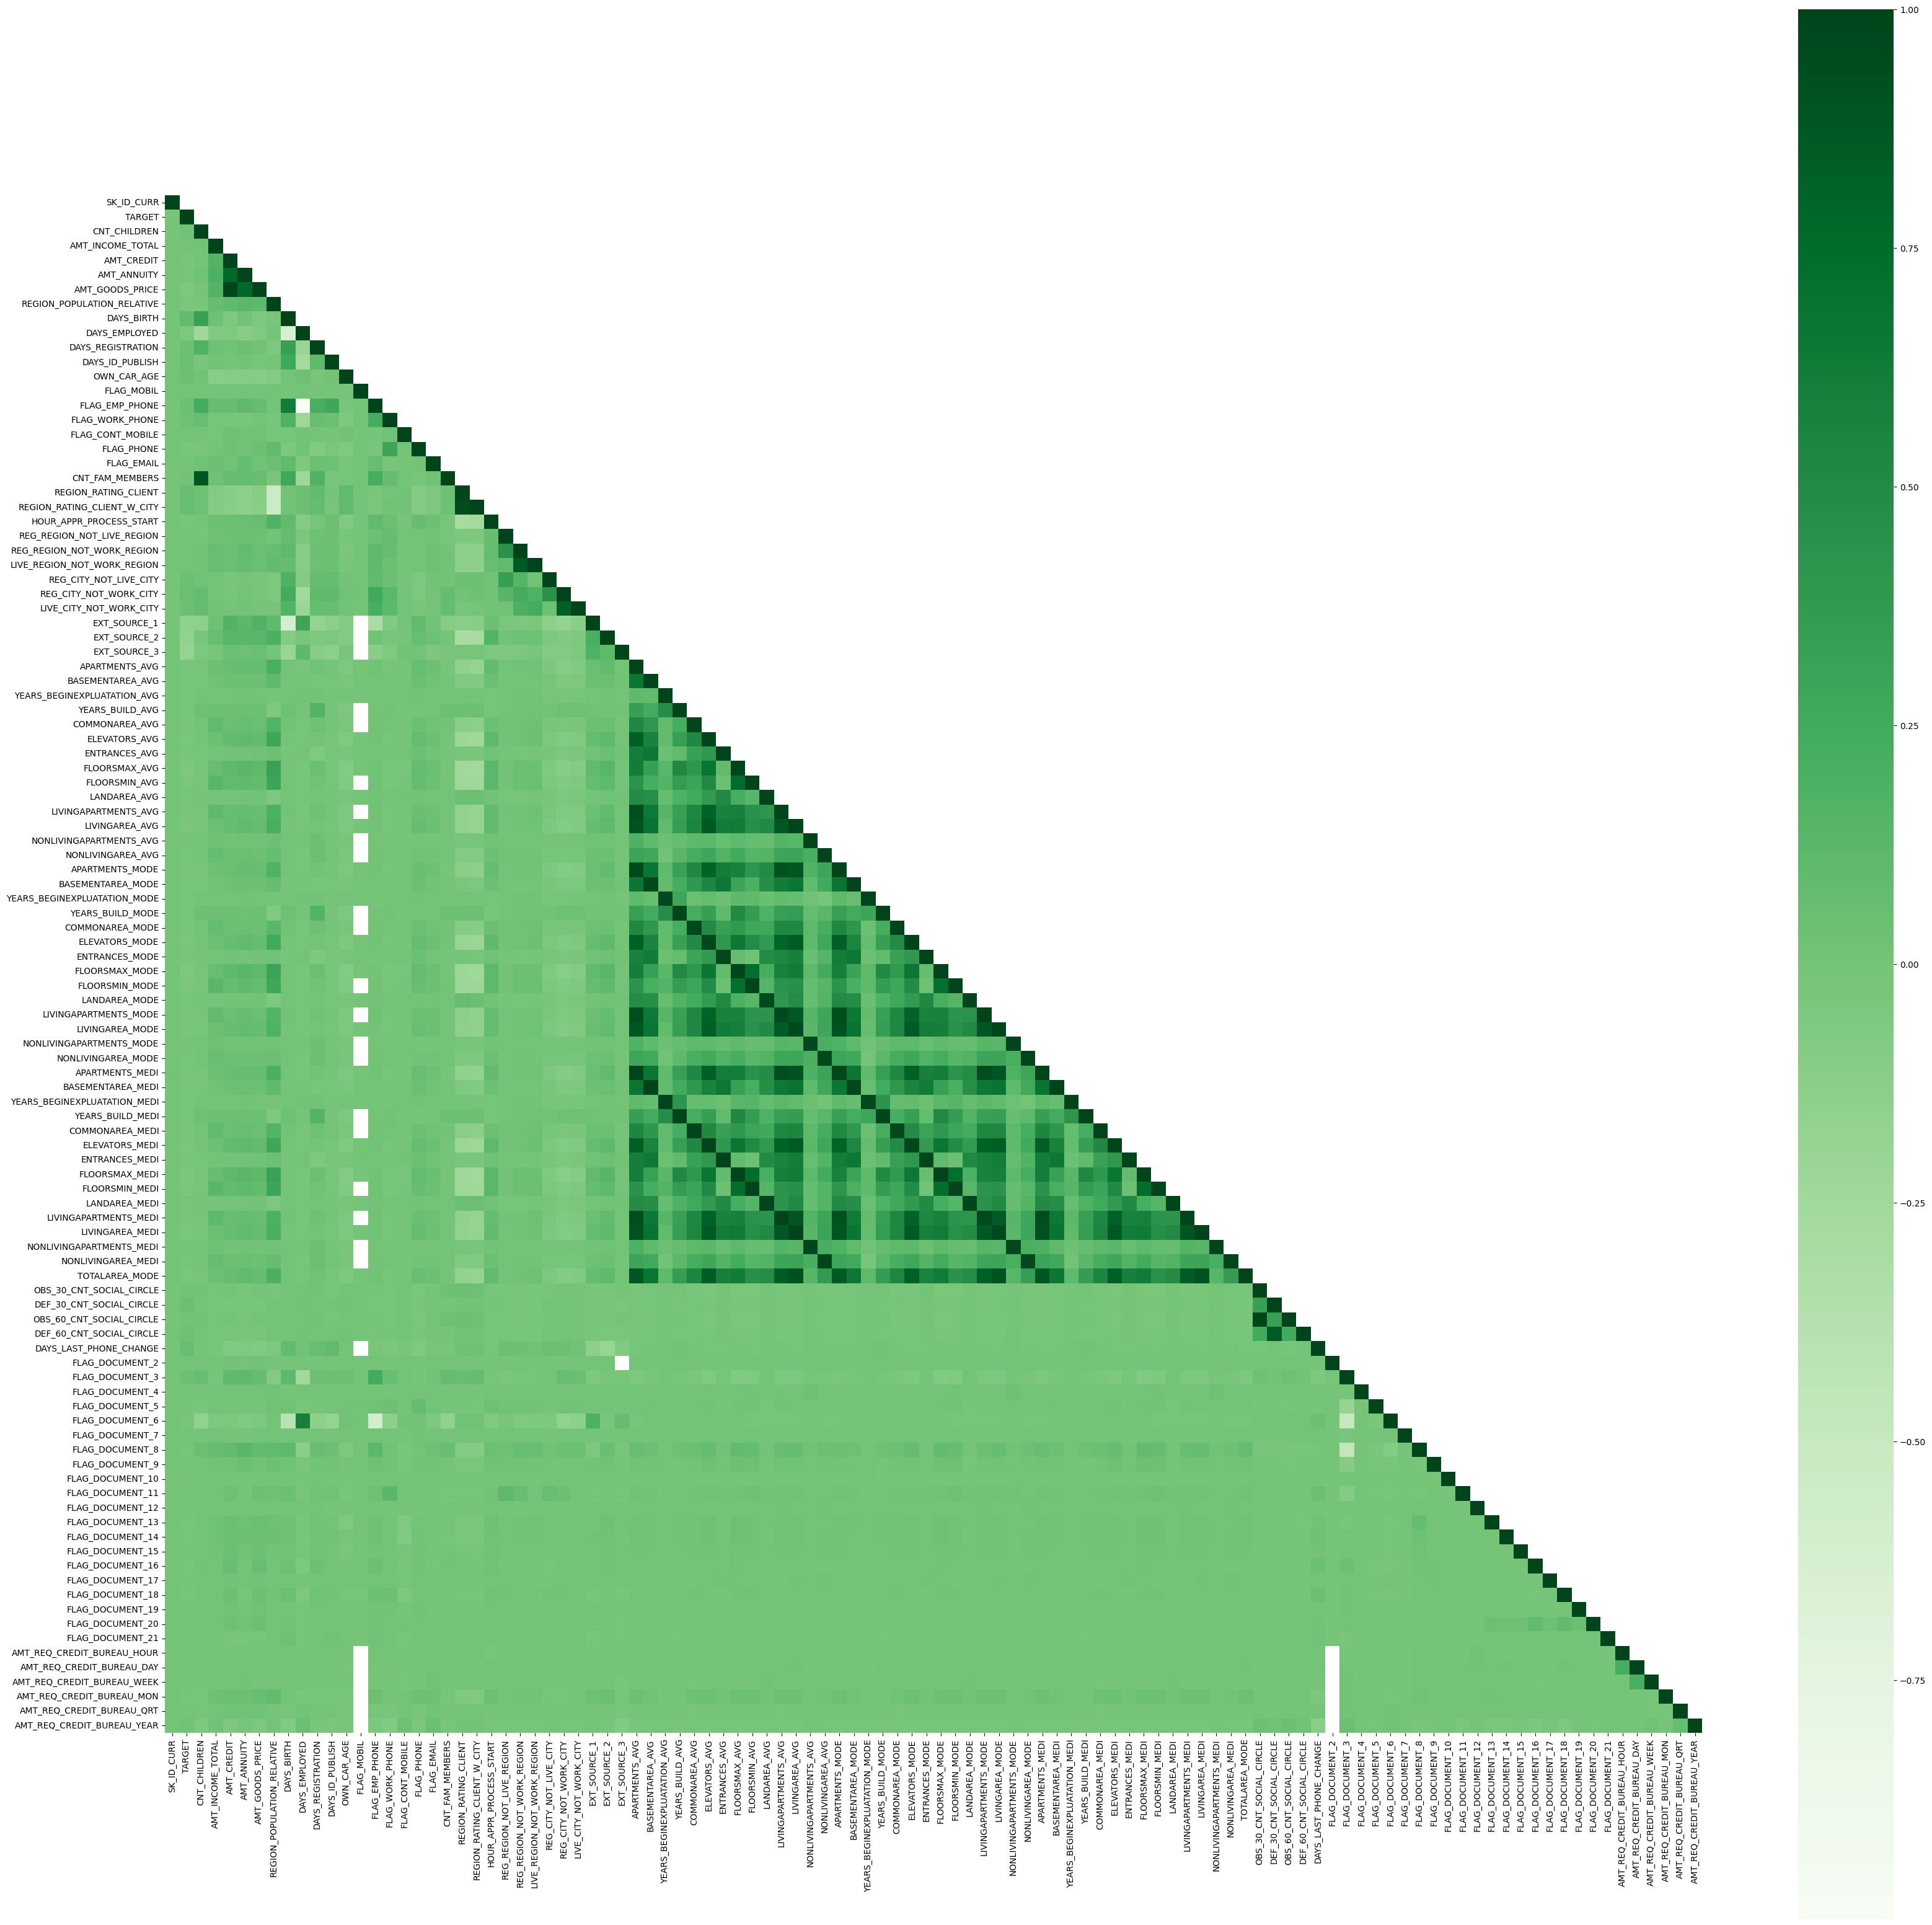

In [13]:
corr_mx_train = train_data.corr()
mask_train = np.array(corr_mx_train)
mask_train[np.tril_indices_from(mask_train)] = False
fig, ax = plt.subplots()
fig.set_size_inches(40, 40)
sns.heatmap(corr_mx_train, cmap = "Greens", mask = mask_train, square = True)

C:\Users\sench\AppData\Local\Temp\ipykernel_17236\1502498957.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mx_test = test_data.corr()


<AxesSubplot: >

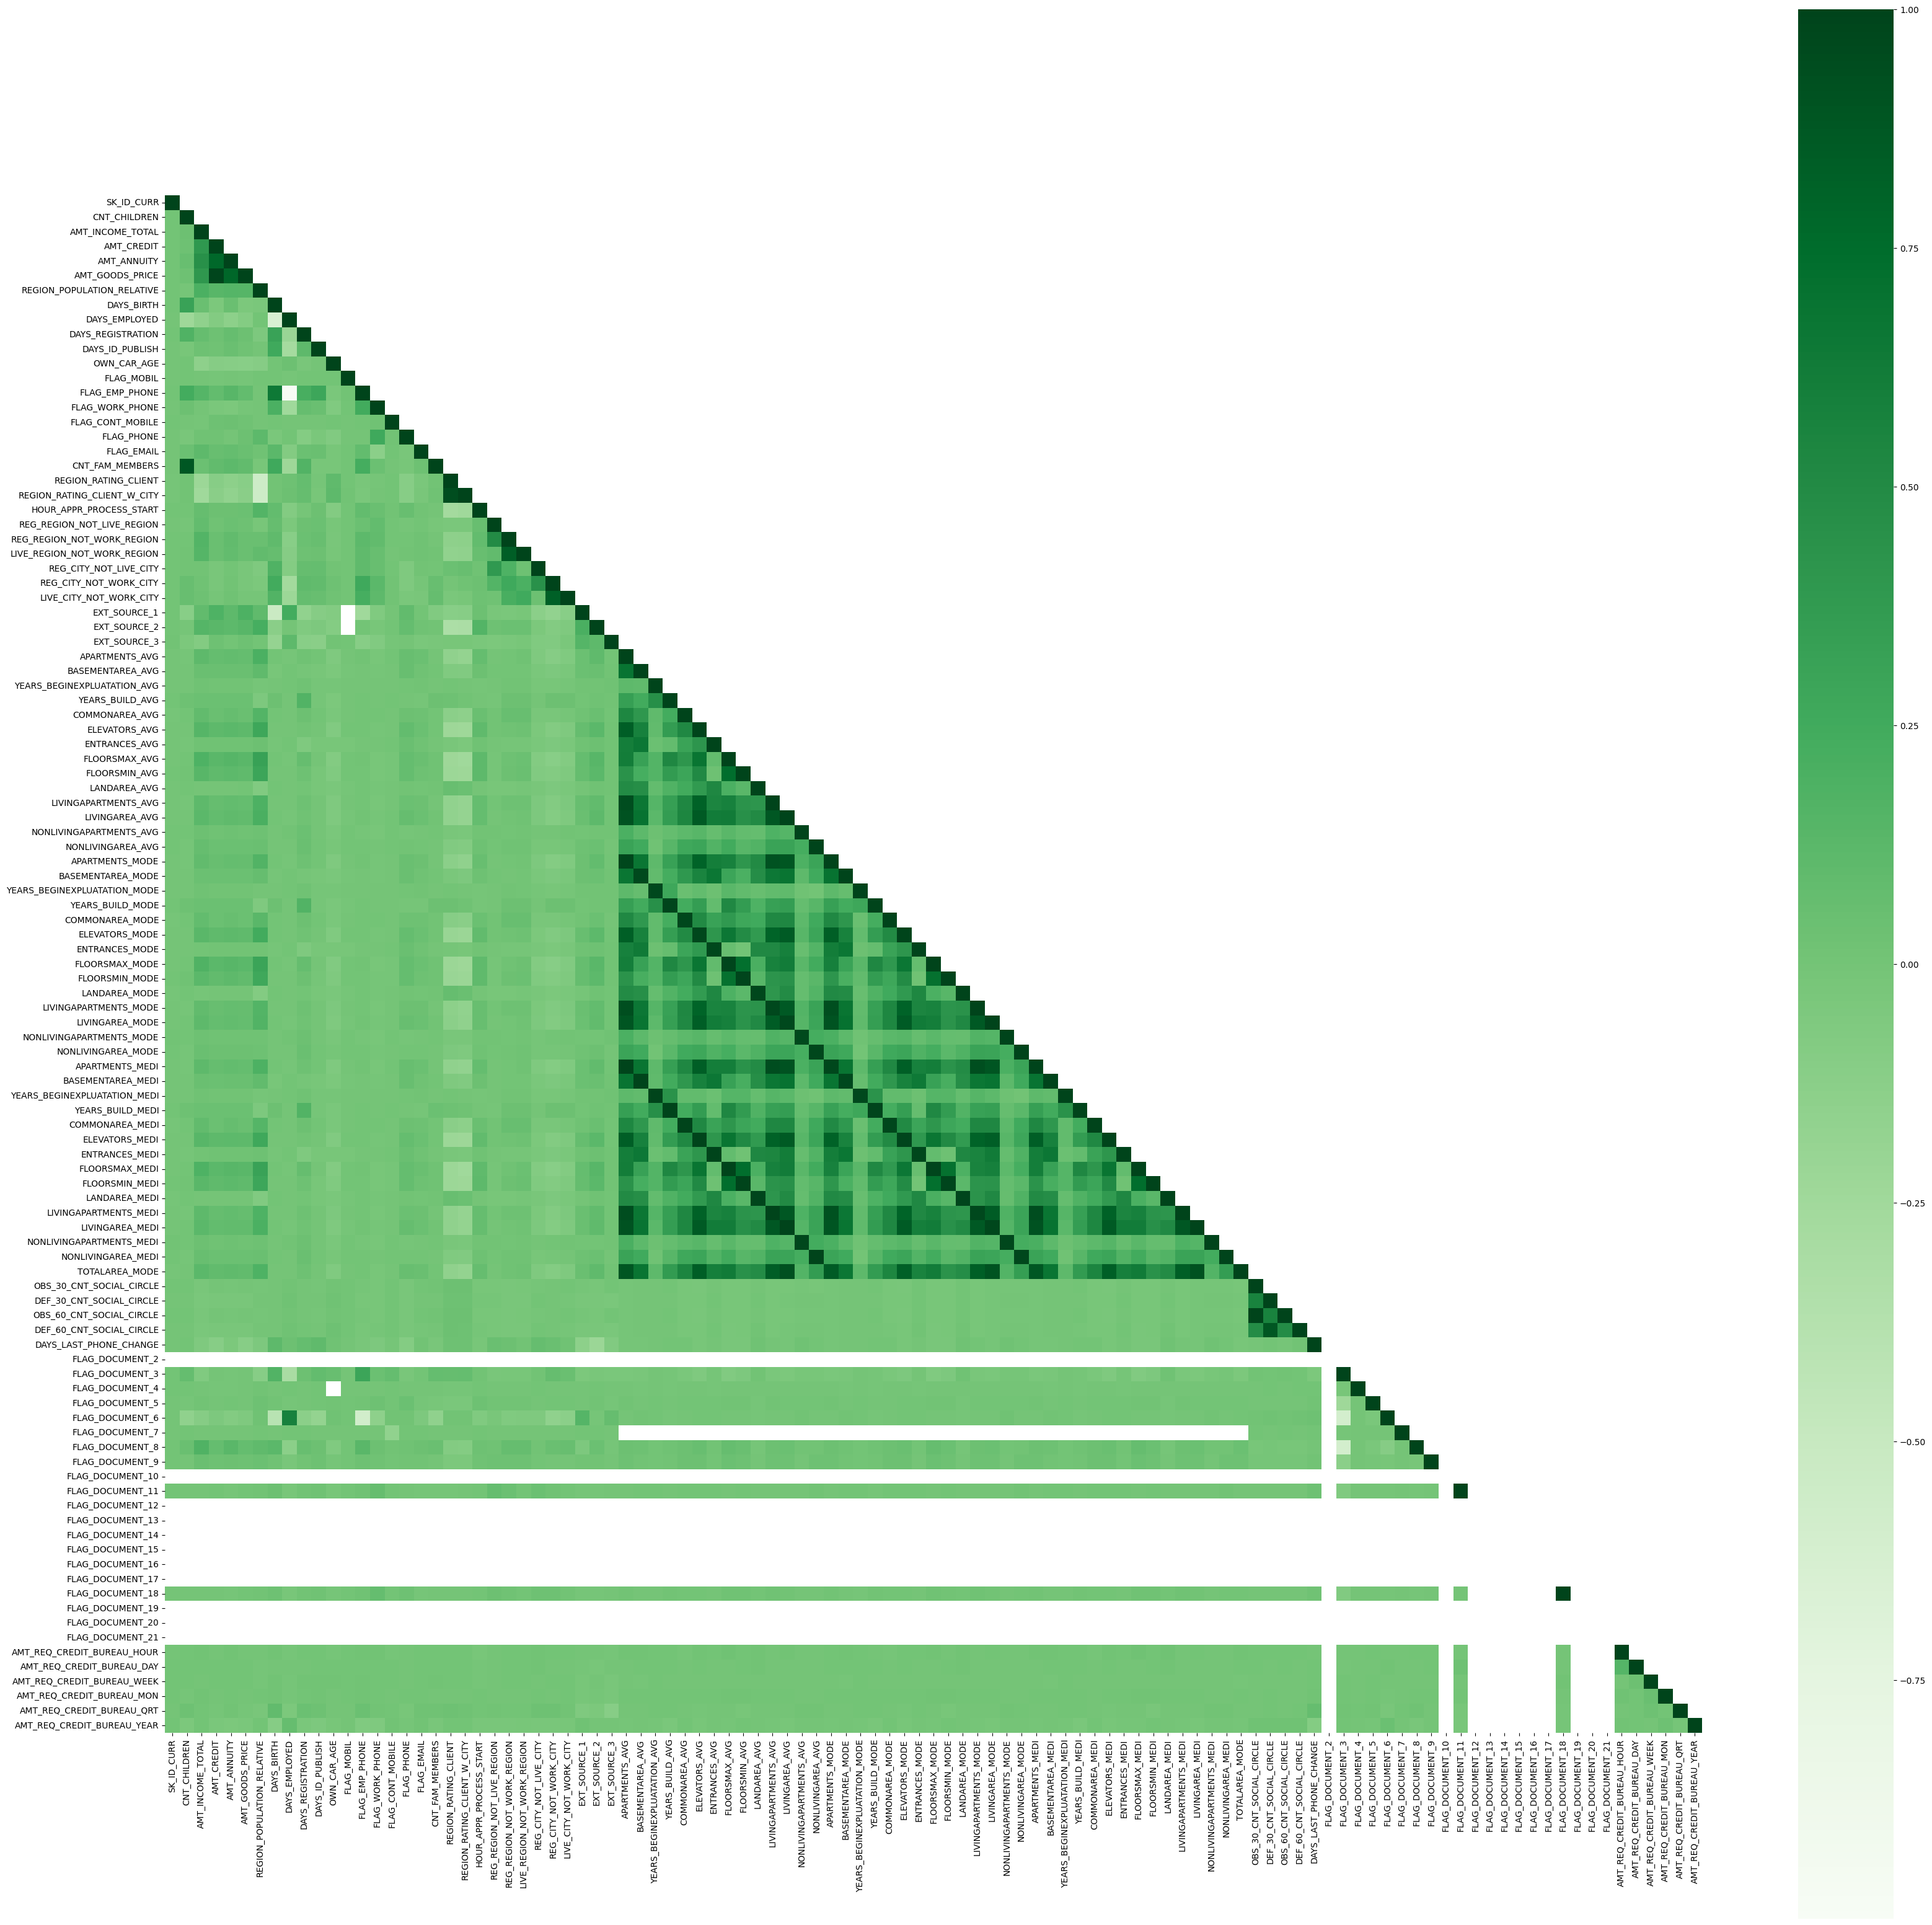

In [14]:
corr_mx_test = test_data.corr()
mask_test = np.array(corr_mx_test)
mask_test[np.tril_indices_from(mask_test)] = False
fig, ax = plt.subplots()
fig.set_size_inches(40, 40)
sns.heatmap(corr_mx_test, cmap = "Greens", mask = mask_test, square = True)

Бачимо доволі багато сильнокорельованих ознак, отже деякі можемо видалити без шкоди для моделі

In [ ]:
correlated_pairs = []
for i in range(len(corr_mx_train.columns)):
    for j in range(i + 1, len(corr_mx_train.columns)):
        if abs(corr_mx_train.iloc[i,j]) > 0.8:
            correlated_pairs.append((corr_mx_train.columns[i], corr_mx_train.columns[j]))

cols_to_remove = []
for pair in correlated_pairs:
    if pair[0] not in cols_to_remove:
        cols_to_remove.append(pair[1])

train_data = train_data.drop(cols_to_remove, axis=1)

In [16]:
correlated_pairs = []
for i in range(len(corr_mx_test.columns)):
    for j in range(i + 1, len(corr_mx_test.columns)):
        if abs(corr_mx_test.iloc[i,j]) > 0.8:
            correlated_pairs.append((corr_mx_test.columns[i], corr_mx_test.columns[j]))

cols_to_remove = []
for pair in correlated_pairs:
    if pair[0] not in cols_to_remove:
        cols_to_remove.append(pair[1])

test_data = test_data.drop(cols_to_remove, axis=1)

Також приберемо колонки у яких всі значення негативні, адже судячи з описів колонок у датасеті не має бути негативних значень, тож це помилкові значення

In [17]:
negative_cols_train = []
for col in train_data.columns:
    if train_data[col].dtype != "object" and train_data[col].max() < 0:
        negative_cols_train.append(col)

negative_cols_test = []
for col in test_data.columns:
    if test_data[col].dtype != "object" and test_data[col].max() < 0:
        negative_cols_test.append(col)

train_data = train_data.drop(negative_cols_train, axis=1)
test_data = test_data.drop(negative_cols_test, axis=1)

Оцінимо наскільки тренувальний датасет збалансований

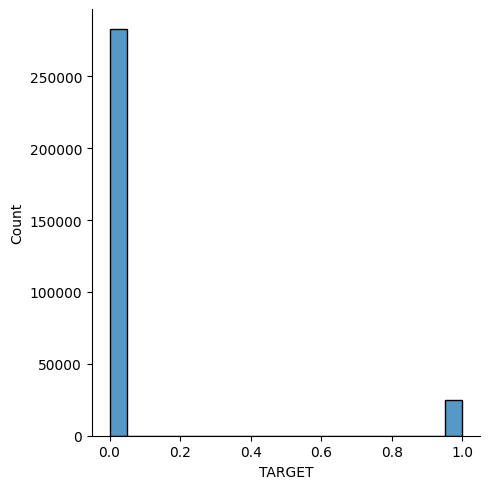

In [18]:
sns.displot(train_data["TARGET"])

Бачимо, що датасет незбалансований

Подивимось на гістограми розподілів числових ознак

In [19]:
numerical_features = train_data.select_dtypes(include = ['int64', 'float64']).columns
numerical_features = numerical_features.delete(0)
numerical_features = numerical_features.delete(0)

array([[<AxesSubplot: title={'center': 'CNT_CHILDREN'}>,
        <AxesSubplot: title={'center': 'AMT_INCOME_TOTAL'}>,
        <AxesSubplot: title={'center': 'AMT_CREDIT'}>,
        <AxesSubplot: title={'center': 'AMT_ANNUITY'}>,
        <AxesSubplot: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot: title={'center': 'DAYS_EMPLOYED'}>,
        <AxesSubplot: title={'center': 'DAYS_REGISTRATION'}>,
        <AxesSubplot: title={'center': 'DAYS_ID_PUBLISH'}>],
       [<AxesSubplot: title={'center': 'OWN_CAR_AGE'}>,
        <AxesSubplot: title={'center': 'FLAG_MOBIL'}>,
        <AxesSubplot: title={'center': 'FLAG_WORK_PHONE'}>,
        <AxesSubplot: title={'center': 'FLAG_CONT_MOBILE'}>,
        <AxesSubplot: title={'center': 'FLAG_PHONE'}>,
        <AxesSubplot: title={'center': 'FLAG_EMAIL'}>,
        <AxesSubplot: title={'center': 'REGION_RATING_CLIENT'}>,
        <AxesSubplot: title={'center': 'HOUR_APPR_PROCESS_START'}>],
       [<AxesSubplot: title={'center': 'REG

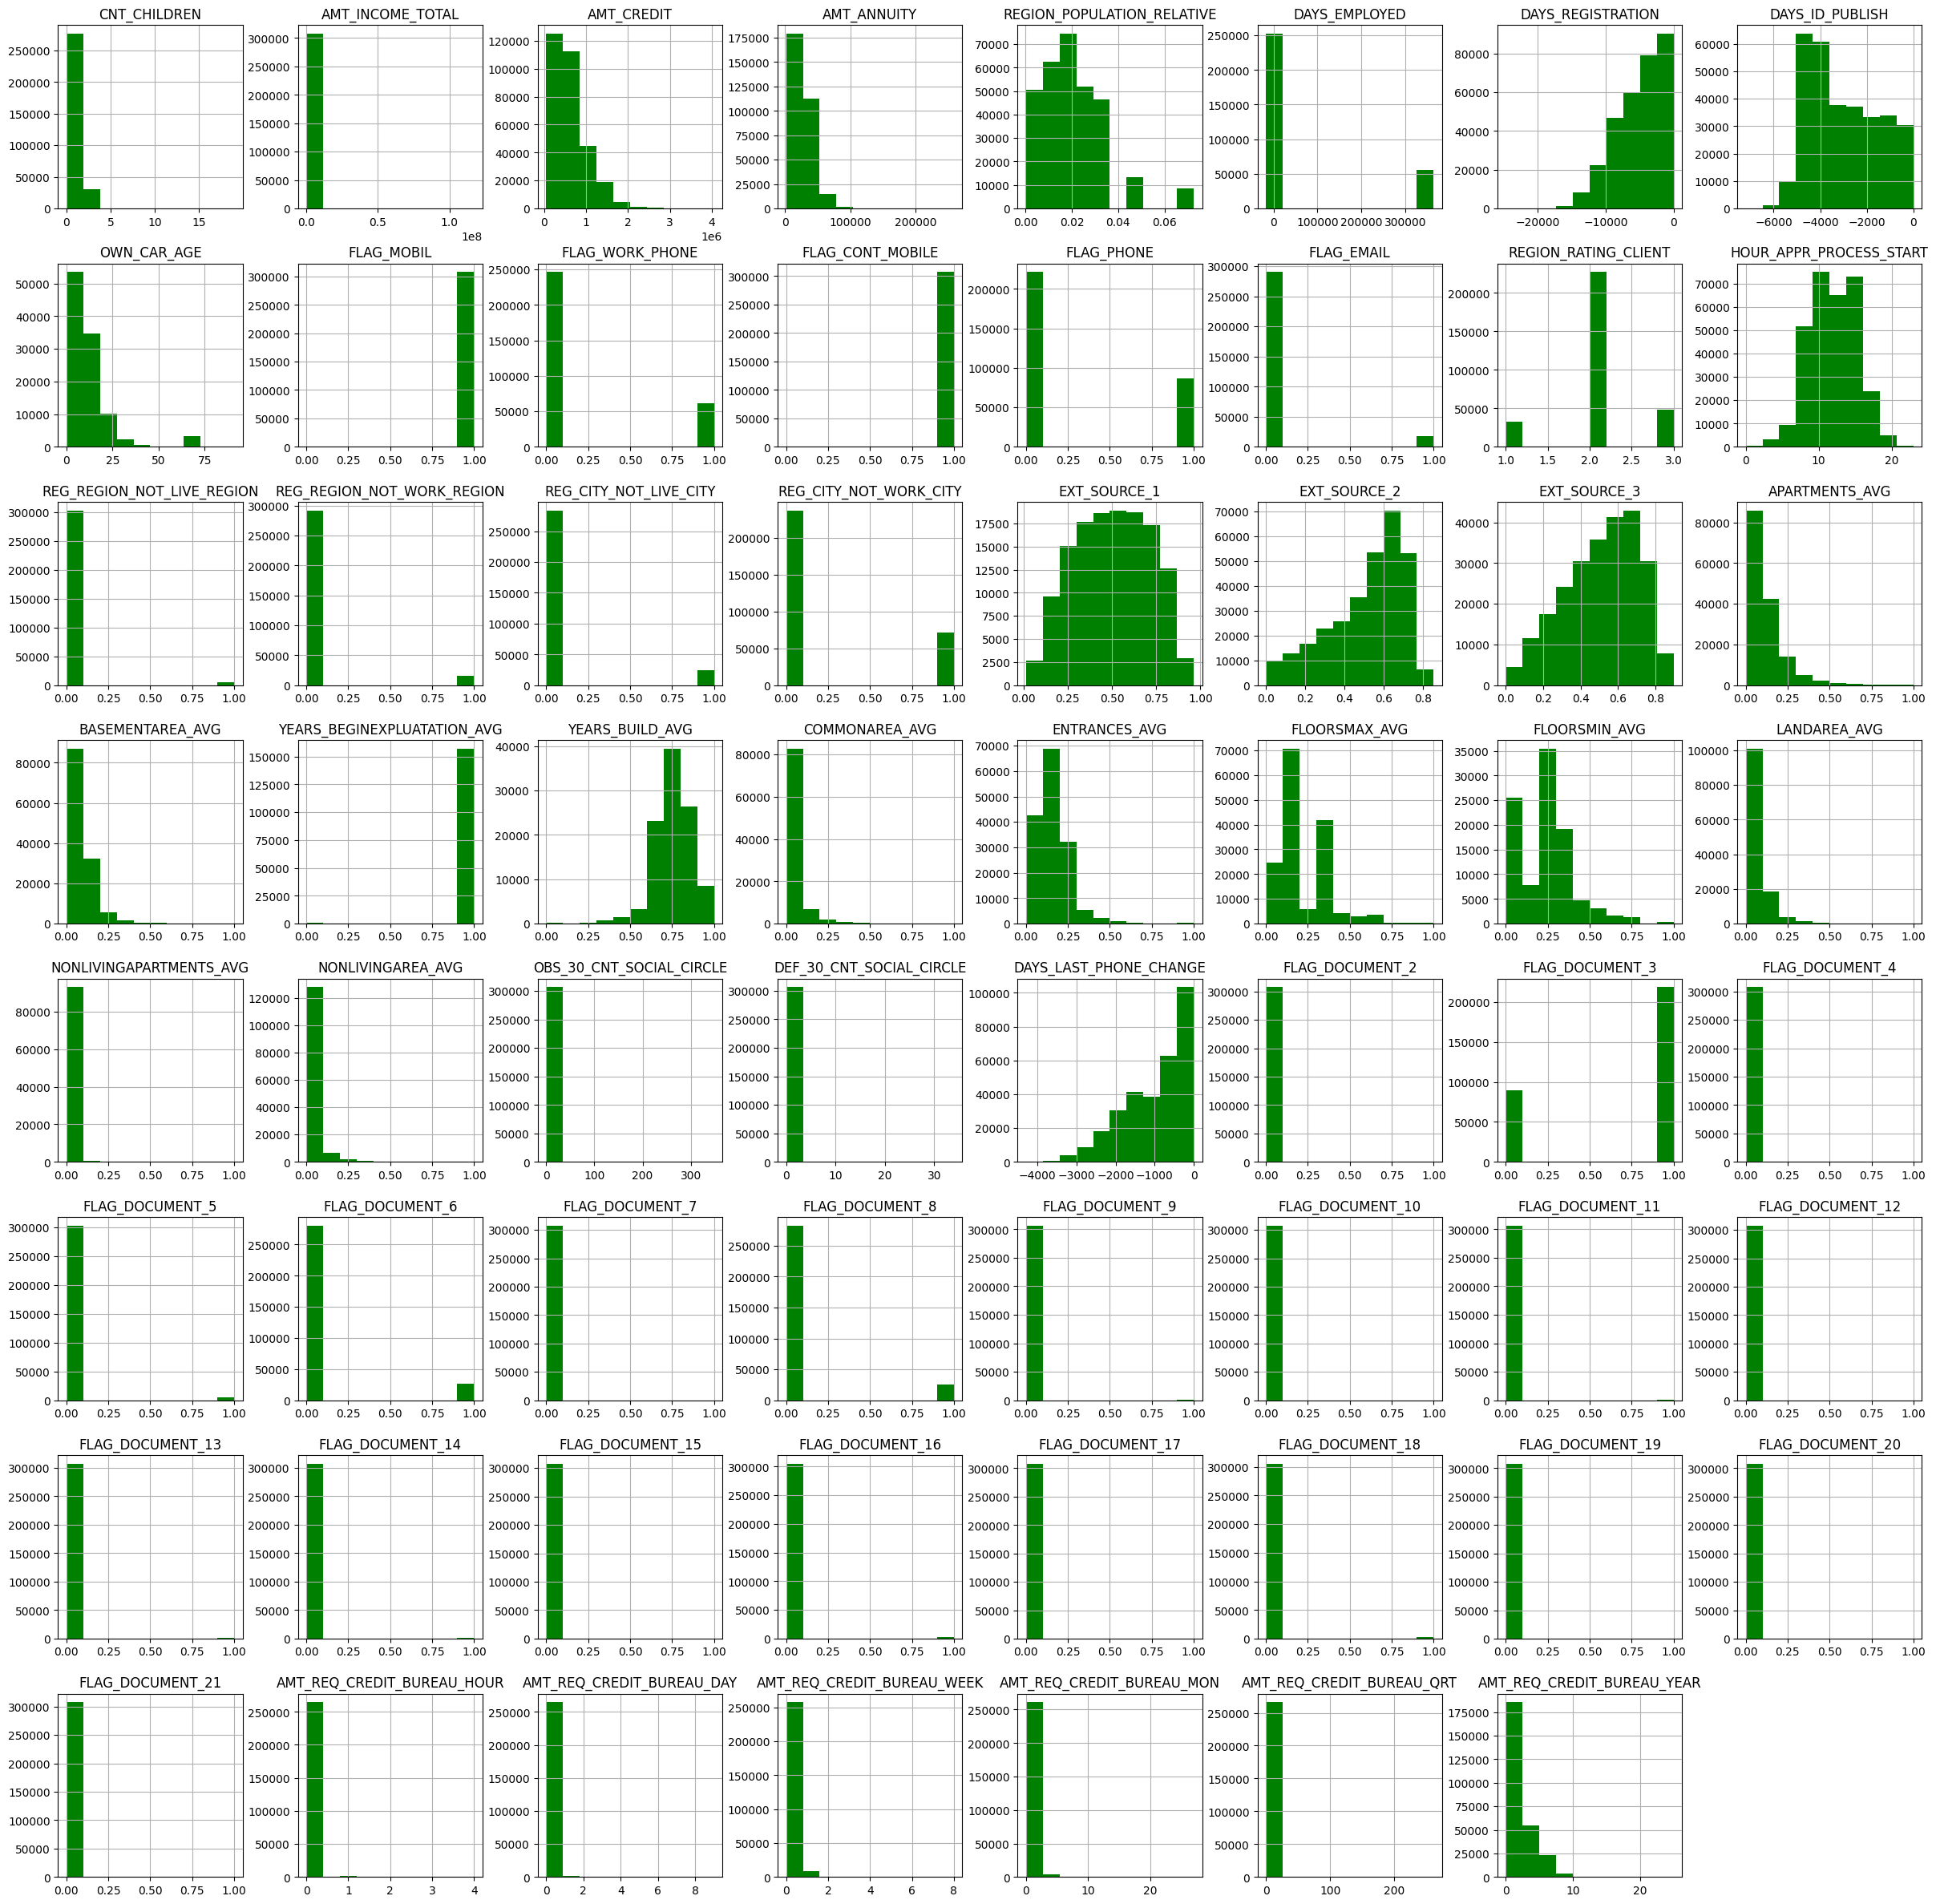

In [20]:
train_data[numerical_features].hist(figsize = (30, 30), color = 'g')

array([[<AxesSubplot: title={'center': 'CNT_CHILDREN'}>,
        <AxesSubplot: title={'center': 'AMT_INCOME_TOTAL'}>,
        <AxesSubplot: title={'center': 'AMT_CREDIT'}>,
        <AxesSubplot: title={'center': 'AMT_ANNUITY'}>,
        <AxesSubplot: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot: title={'center': 'DAYS_EMPLOYED'}>,
        <AxesSubplot: title={'center': 'DAYS_REGISTRATION'}>,
        <AxesSubplot: title={'center': 'DAYS_ID_PUBLISH'}>],
       [<AxesSubplot: title={'center': 'OWN_CAR_AGE'}>,
        <AxesSubplot: title={'center': 'FLAG_MOBIL'}>,
        <AxesSubplot: title={'center': 'FLAG_WORK_PHONE'}>,
        <AxesSubplot: title={'center': 'FLAG_CONT_MOBILE'}>,
        <AxesSubplot: title={'center': 'FLAG_PHONE'}>,
        <AxesSubplot: title={'center': 'FLAG_EMAIL'}>,
        <AxesSubplot: title={'center': 'REGION_RATING_CLIENT'}>,
        <AxesSubplot: title={'center': 'HOUR_APPR_PROCESS_START'}>],
       [<AxesSubplot: title={'center': 'REG

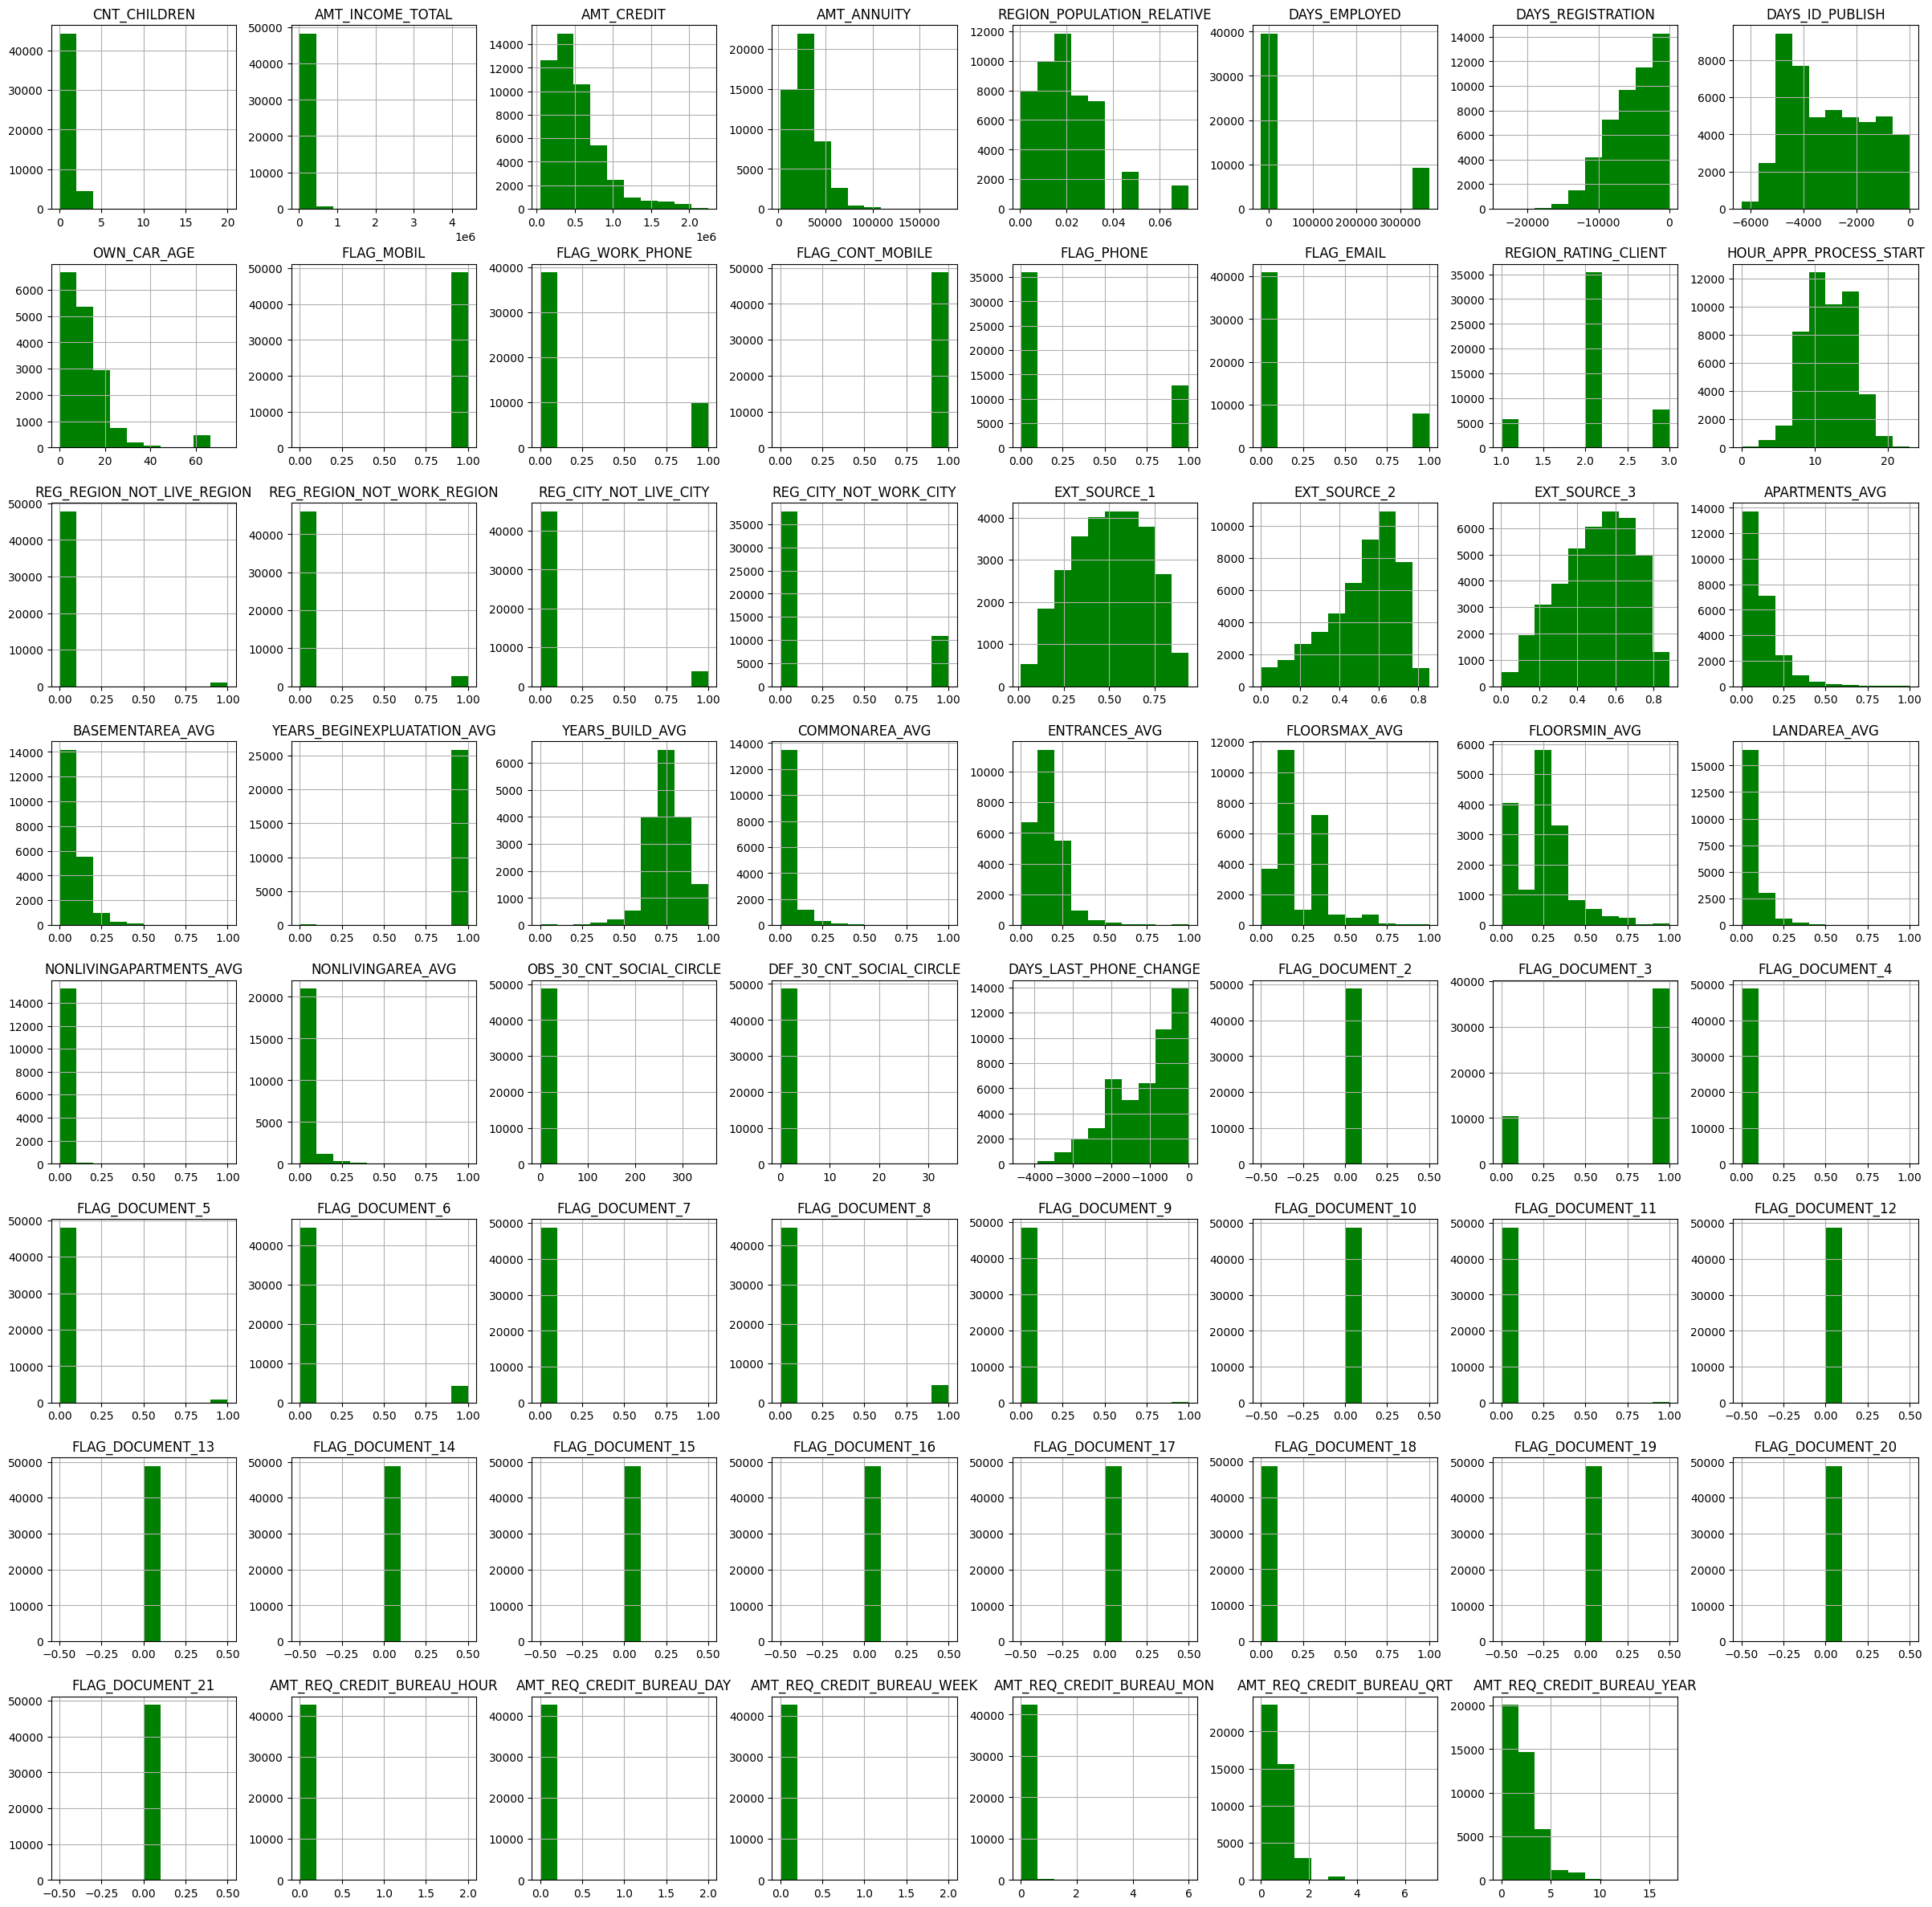

In [21]:
test_data[numerical_features].hist(figsize = (30, 30), color = 'g')

Можемо побачити з гістограм, що деякі ознаки з числовими типами насправді категоріальні, отже можемо прибрати їх зі списку числових

In [22]:
numerical_features = numerical_features.drop(["FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL",
                                             "REGION_RATING_CLIENT", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY",
                                             "REG_CITY_NOT_WORK_CITY", "REG_REGION_NOT_LIVE_REGION", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4",
                                             "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10",
                                             "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16",
                                             "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"])

Виведемо і оцінимо boxplot-и

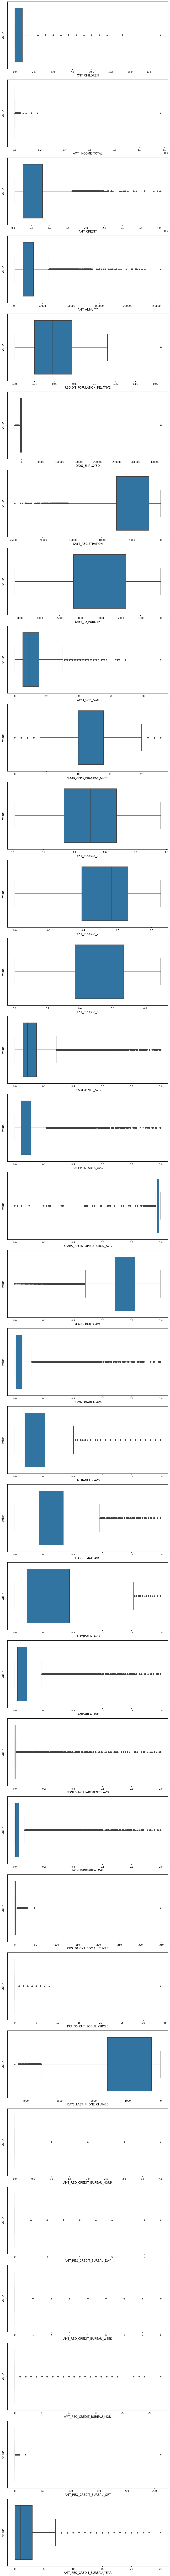

In [23]:
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(10, 150))
for i, col in enumerate(numerical_features):
    sns.boxplot(x = train_data[col], ax = axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Value', fontsize=12)
plt.tight_layout()
plt.show()

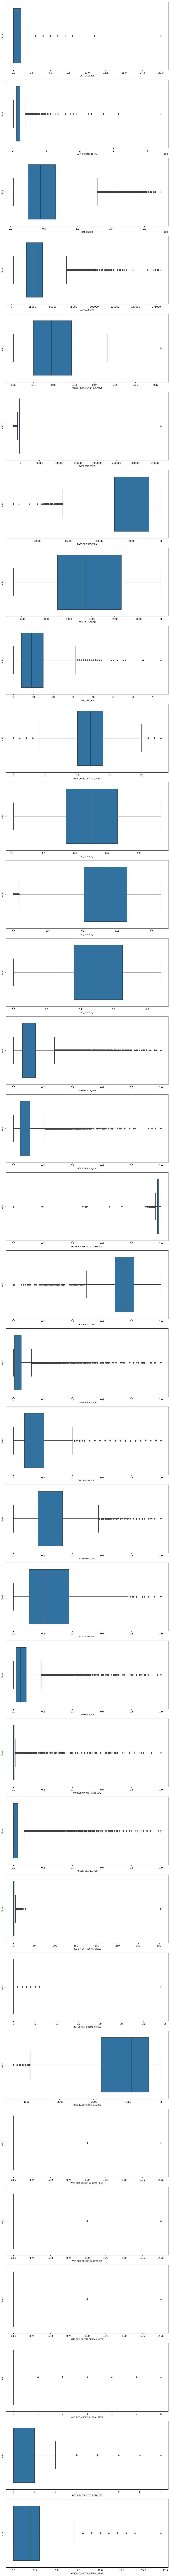

In [24]:
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(10, 150))
for i, col in enumerate(numerical_features):
    sns.boxplot(x = test_data[col], ax = axes[i])
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel('Value', fontsize=8)
plt.tight_layout()
plt.show()

Подивимось на графіки категоріальних ознак

In [25]:
object_features = train_data.select_dtypes(include = ['object']).columns
categorical_features = object_features.union(["FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL",
                                            "REGION_RATING_CLIENT", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY",
                                            "REG_CITY_NOT_WORK_CITY", "REG_REGION_NOT_LIVE_REGION", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4",
                                            "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10",
                                            "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16",
                                            "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"])
categorical_features

Index(['CODE_GENDER', 'EMERGENCYSTATE_MODE', 'FLAG_CONT_MOBILE',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_EMAIL', 'FLAG_MOBIL',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_PHONE', 'FLAG_WORK_PHONE',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'NAME_CONTRACT_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE', 'REGION_RATING_CLIENT', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_LIVE_REGION', 'REG_R

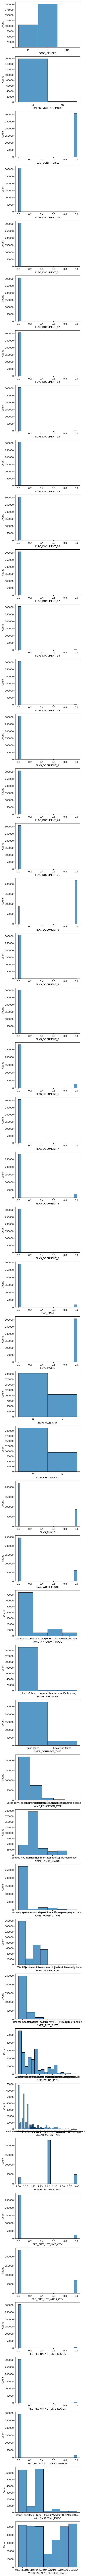

In [27]:
fig, axes = plt.subplots(nrows = len(categorical_features), ncols = 1)
fig.set_size_inches(5, 200)
for i, col in enumerate(categorical_features):
    sns.histplot(train_data[col], kde = False, ax = axes[i])
plt.show()

In [28]:
for i, col in enumerate(categorical_features):
    sns.histplot(test_data[col], kde = False, ax = axes[i])
plt.show()

Бачимо доволі багато категоріальних ознак з текстовими даними, їх треба закодувати.

In [29]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

for col in object_features:
    if len(list(train_data[col].unique())) <= 2:
            train_data[col] = encode.fit_transform(train_data[col])
            test_data[col] = encode.transform(test_data[col])

train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

target_buff = train_data["TARGET"] 
train_data, test_data = train_data.align(test_data, join = 'inner', axis=1)
train_data["TARGET"] = target_buff

print(train_data.shape)
print(test_data.shape)

(307511, 199)
(48744, 198)


Також замінимо всі missing values на моду колонки, щоб не шкодити датасету видаляючи завелику кількість даних

In [30]:
from sklearn.impute import SimpleImputer

target_buff = train_data["TARGET"] 
train_data = train_data.drop(columns=["TARGET"])

imp = SimpleImputer(strategy='mean') 
train_data = pd.DataFrame(imp.fit_transform(train_data), columns = train_data.columns) 
test_data = pd.DataFrame(imp.transform(test_data), columns = test_data.columns) 
train_data["TARGET"] = target_buff

train_data.isnull().sum()

SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
                                  ..
WALLSMATERIAL_MODE_Stone, brick    0
WALLSMATERIAL_MODE_Wooden          0
EMERGENCYSTATE_MODE_No             0
EMERGENCYSTATE_MODE_Yes            0
TARGET                             0
Length: 199, dtype: int64

Класифікуємо дані за допомогою логістичної регресії і перевіримо результат метрикою ROC_AUC

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [33]:
data = train_data.drop(columns = ["TARGET"])
x_train, x_val, y_train, y_val = train_test_split(data, train_data["TARGET"], test_size = 0.2)

scaler = StandardScaler()
scaler_x_train = scaler.fit_transform(x_train)
scaler_x_val = scaler.transform(x_val)
scaler_test = scaler.transform(test_data)

log_reg = LogisticRegression(class_weight = "balanced", max_iter = 1500, tol = 0.001)
log_reg.fit(scaler_x_train, y_train)
predict_train = log_reg.predict(scaler_x_train)
print(roc_auc_score(y_train, predict_train))
predict_test = log_reg.predict(scaler_x_val)
print(roc_auc_score(y_val, predict_test))

0.6808424827046902
0.6841887569081895


Бачимо доволі непоганий результат. Запишемо дані за прикладом у submission файл

In [34]:
pred_prob = log_reg.predict_proba(scaler_test)[:, 1]
test_data = test_data.astype({"SK_ID_CURR": int})
result = pd.DataFrame({"SK_ID_CURR": test_data["SK_ID_CURR"], "TARGET": pred_prob}).to_csv('submission.csv', index = False)